In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Step 1: Scrape The Data

In [2]:
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
table = soup.find('table', attrs = {'class':'wpr-table'})
table

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Starbucks Stores 2023<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

In [6]:
state = []
sb24 = []
sb23 = []
sb21 = []

for row in table.find_all('tr')[1:]:
    state_tag = row.find('th').get_text(strip=False)
    state.append(state_tag)

    data = row.find_all('td')
    sb23.append(data[0].get_text(strip=True))
    sb21.append(data[1].get_text(strip = True))
    #sb24.append(data[2].get_text(strip=True))
    stores2024_tag = data[2].find("a") or data[2]
    sb24.append(stores2024_tag.get_text(strip = True))

Starbucks_table = pd.DataFrame({'State': state,
                'Starbucks Stores 2023':sb23,
                'Starbucks Stores 2021':sb21,
                'Starbucks Stores 2024':sb24})

Starbucks_table

,State,Starbucks Stores 2023,Starbucks Stores 2021,Starbucks Stores 2024
0,California,"3,080","2,959","3,117"
1,Texas,"1,346","1,215","1,409"
2,Florida,844,786,892
3,Washington,741,739,736
4,New York,692,643,715
5,Illinois,677,621,685
6,Arizona,548,535,579
7,Colorado,495,497,506
8,Ohio,491,446,499
9,Virginia,489,456,510


In [7]:
response = requests.get('https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state')

In [8]:
soup = BeautifulSoup(response.content, 'html.parser')

In [9]:
table = soup.find('table', attrs = {'class':'wpr-table'})

In [11]:
state = []
sb24 = []
sb23 = []

for row in table.find_all('tr')[1:]:
    state_tag = row.find('th')
    state.append(state_tag.get_text(strip=False))

    data = row.find_all('td')
    sb24.append(data[0].get_text(strip=True))
    sb23.append(data[1].get_text(strip=True))

Dunkin_table = pd.DataFrame({'State': state,
                'Dunkin Stores 2024':sb24,
                'Dunkin Stores 2023':sb23})
Dunkin_table

,State,Dunkin Stores 2024,Dunkin Stores 2023
0,New York,"1,431","1,414"
1,Massachusetts,"1,042","1,068"
2,Florida,909,883
3,New Jersey,872,866
4,Illinois,711,692
5,Pennsylvania,650,629
6,Connecticut,476,480
7,Maryland,311,303
8,Georgia,287,265
9,Ohio,261,245


# Step 2: Merge and Tidy Data

In [12]:
coffee_data = Starbucks_table.merge(Dunkin_table)

coffee_data

,State,Starbucks Stores 2023,Starbucks Stores 2021,Starbucks Stores 2024,Dunkin Stores 2024,Dunkin Stores 2023
0,California,"3,080","2,959","3,117",143,134
1,Texas,"1,346","1,215","1,409",226,196
2,Florida,844,786,892,909,883
3,Washington,741,739,736,0,19
4,New York,692,643,715,"1,431","1,414"
5,Illinois,677,621,685,711,692
6,Arizona,548,535,579,110,102
7,Colorado,495,497,506,48,43
8,Ohio,491,446,499,261,245
9,Virginia,489,456,510,244,230


In [13]:
df_long = pd.melt(coffee_data, id_vars=['State'], 
                  value_vars=['Starbucks Stores 2021', 'Starbucks Stores 2023','Starbucks Stores 2024','Dunkin Stores 2024', 'Dunkin Stores 2023'],
                  var_name='store_year', 
                  value_name='Number of Stores')

df_long['store'] = df_long['store_year'].str.extract(r'([a-zA-Z]+)')
df_long['year'] = df_long['store_year'].str.extract(r'(\d+)')

df_long = df_long.drop(columns=['store_year'])

df_long = df_long[['State', 'year', 'store', 'Number of Stores']]

df_long

,State,year,store,Number of Stores
0,California,2021,Starbucks,"2,959"
1,Texas,2021,Starbucks,"1,215"
2,Florida,2021,Starbucks,786
3,Washington,2021,Starbucks,739
4,New York,2021,Starbucks,643
...,...,...,...,...
250,South Dakota,2023,Dunkin,0
251,West Virginia,2023,Dunkin,27
252,Wyoming,2023,Dunkin,1
253,North Dakota,2023,Dunkin,0


# Step 3: Scrape the Population Page

In [14]:
response = requests.get('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
soup = BeautifulSoup(response.content, 'html.parser')

In [15]:
table = soup.find('table', attrs = {'class':'wikitable'})

In [16]:
state = []
pop = []

for row in table.find_all('tr')[1:]:
    data = row.find_all('td')

    state.append(data[2].get_text(strip = True))

    pop.append(data[3].get_text(strip = True))


population_data = pd.DataFrame({'State': state,
              'Population':pop})



In [17]:
Full_data = df_long.merge(population_data)

# Step 4: Add Stock Price to Table

In [18]:
Price = {'Starbucks':'110.66B',
 'Dunkin':'8.78B'}

Finance_df = pd.DataFrame({
    'store':Price.keys(),
    'Market Cap':Price.values()
})

Full_data = Full_data.merge(Finance_df)

# Step 5: Add Region to Table

In [33]:
region_mapping = {
    'Connecticut': 'Northeast',
    'Maine': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'New Jersey': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Michigan': 'Midwest',
    'Ohio': 'Midwest',
    'Wisconsin': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Maryland': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Virginia': 'South',
    'District of Columbia': 'South',
    'West Virginia': 'South',
    'Alabama': 'South',
    'Kentucky': 'South',
    'Mississippi': 'South',
    'Tennessee': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    
    'Arizona': 'West',
    'Colorado': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Utah': 'West',
    'Wyoming': 'West',
    'Alaska': 'West',
    'California': 'West',
    'Hawaii': 'West',
    'Oregon': 'West',
    'Washington': 'West'
}

Full_data['Region'] = Full_data['State'].map(region_mapping)
Full_data.head()

,State,year,store,Number of Stores,Population,Market Cap,Region
0,California,2021,Starbucks,2959.0,39538223,110.66B,West
1,California,2023,Starbucks,3080.0,39538223,110.66B,West
2,California,2024,Starbucks,3117.0,39538223,110.66B,West
3,Texas,2021,Starbucks,1215.0,30145505,110.66B,South
4,Texas,2023,Starbucks,1346.0,30145505,110.66B,South


# Step 6: Analyze

In [20]:
import plotnine as plt
from plotnine import *

In [36]:
Full_data['Number of Stores'] = Full_data['Number of Stores'].str.replace(',', '')
Full_data['Population'] = Full_data['Population'].str.replace(',', '')

Full_data['Number of Stores'] = pd.to_numeric(Full_data['Number of Stores'], errors = 'coerce')
Full_data['Population'] = pd.to_numeric(Full_data['Population'], errors = 'coerce')
Full_data['store'] = Full_data['store'].astype('category')
Full_data['State'] = Full_data['State'].astype('category')
Full_data.head()

,State,year,store,Number of Stores,Population,Market Cap,Region
0,California,2021,Starbucks,2959.0,39538223,110.66B,West
1,California,2023,Starbucks,3080.0,39538223,110.66B,West
2,California,2024,Starbucks,3117.0,39538223,110.66B,West
3,Texas,2021,Starbucks,1215.0,30145505,110.66B,South
4,Texas,2023,Starbucks,1346.0,30145505,110.66B,South


c:\Users\rtnee\anaconda3\Lib\site-packages\plotnine\layer.py:344: PlotnineWarning: position_stack : Removed 43 rows containing missing values.


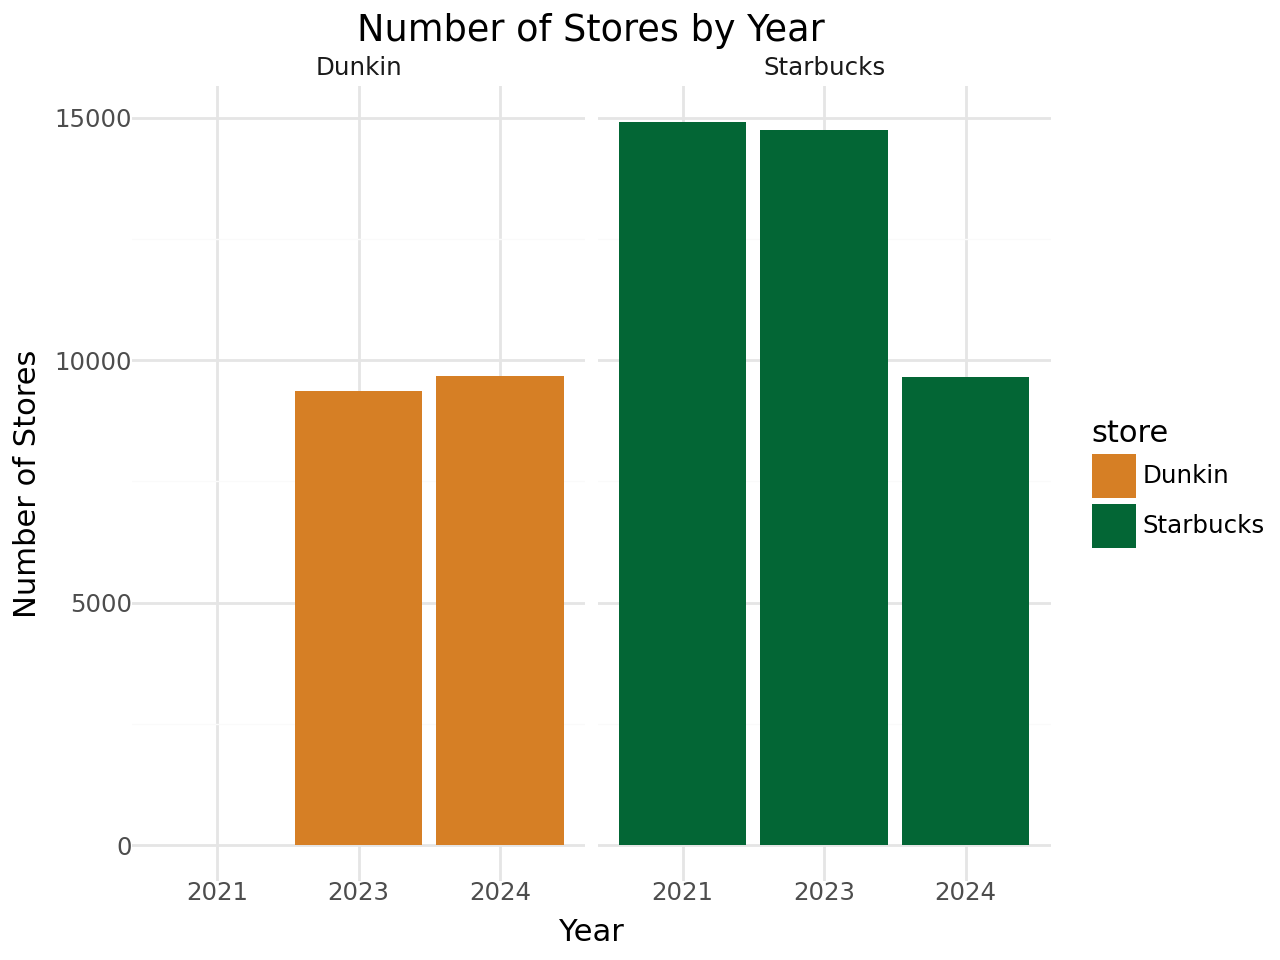

In [42]:
custom_colors = {
    'Starbucks': '#036635',
    'Dunkin': '#D67F25'
}

(ggplot(Full_data, aes(x = 'year', y = 'Number of Stores', fill = 'store')) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Stores by Year",
       x = "Year",
       y = "Number of Stores") +
   scale_fill_manual(values = custom_colors) +
  facet_wrap('~ store') +
  theme_minimal())

From the graph above we can see the number of stores for each chain over the last few years. We can see that Dunkin has increased the amount of locations that they have from 2023 to 2024. At the same time Starbucks slightly decreased their locations from 2021 to 2023. The graph also makes it appear that Starbucks closed many more locations from 2023 to 2024, however, this is misleading because the 2024 data for the Starbucks locations is not complete, thus this can not be seen as accurate. Overall, we can see that there are more Starbucks locations than Dunkin locations for each year in total. In the graphs below we will analyze this further.

C:\Users\rtnee\AppData\Local\Temp\ipykernel_28708\397326016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


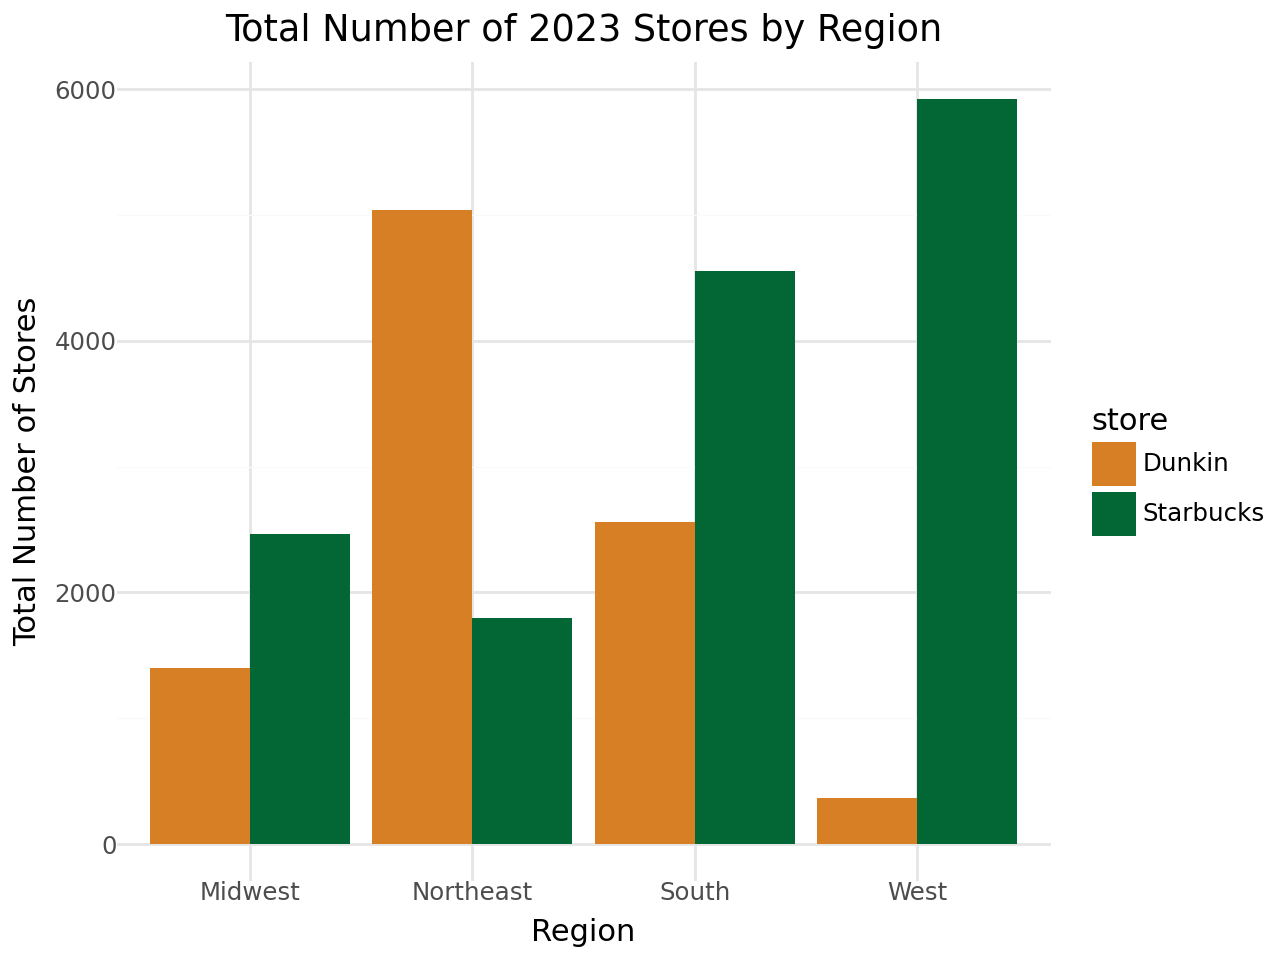

In [43]:
Full_data_2023 = Full_data[Full_data['year'] == '2023']
Full_data_summarized = Full_data_2023.groupby(['Region', 'store'], as_index=False)['Number of Stores'].sum()

custom_colors = {
    'Starbucks': '#036635',
    'Dunkin': '#D67F25'
}
(ggplot(Full_data_summarized, aes(x='Region', y='Number of Stores', fill='store')) +
               geom_bar(stat='identity', position='dodge') +
               labs(title="Total Number of 2023 Stores by Region",
                    x="Region",
                    y="Total Number of Stores") +
                scale_fill_manual(values=custom_colors) +
               theme_minimal())

The graph above filters the 2023 stores for each chain and displays the total locations for each region. The reason why 2023 was selected is because it is the only common year that has complete data which allows for a more accurate comparison of the two chains. The visualization above shows us that Starbucks is the dominant chain in the West region while Dunkin is the dominant chain in the Northeast region. Dunkin has very few locations in both the Midwest and West regions. As was discussed earlier, Starbucks has more locations overall which is also displayed here as Starbucks' least popular region almost has more locations than Dunkin's second most popular region. Starbucks is the dominant coffee chain of these too brands for every region except the Northeast.

C:\Users\rtnee\AppData\Local\Temp\ipykernel_28708\2098473057.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
c:\Users\rtnee\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 16 rows containing missing values.


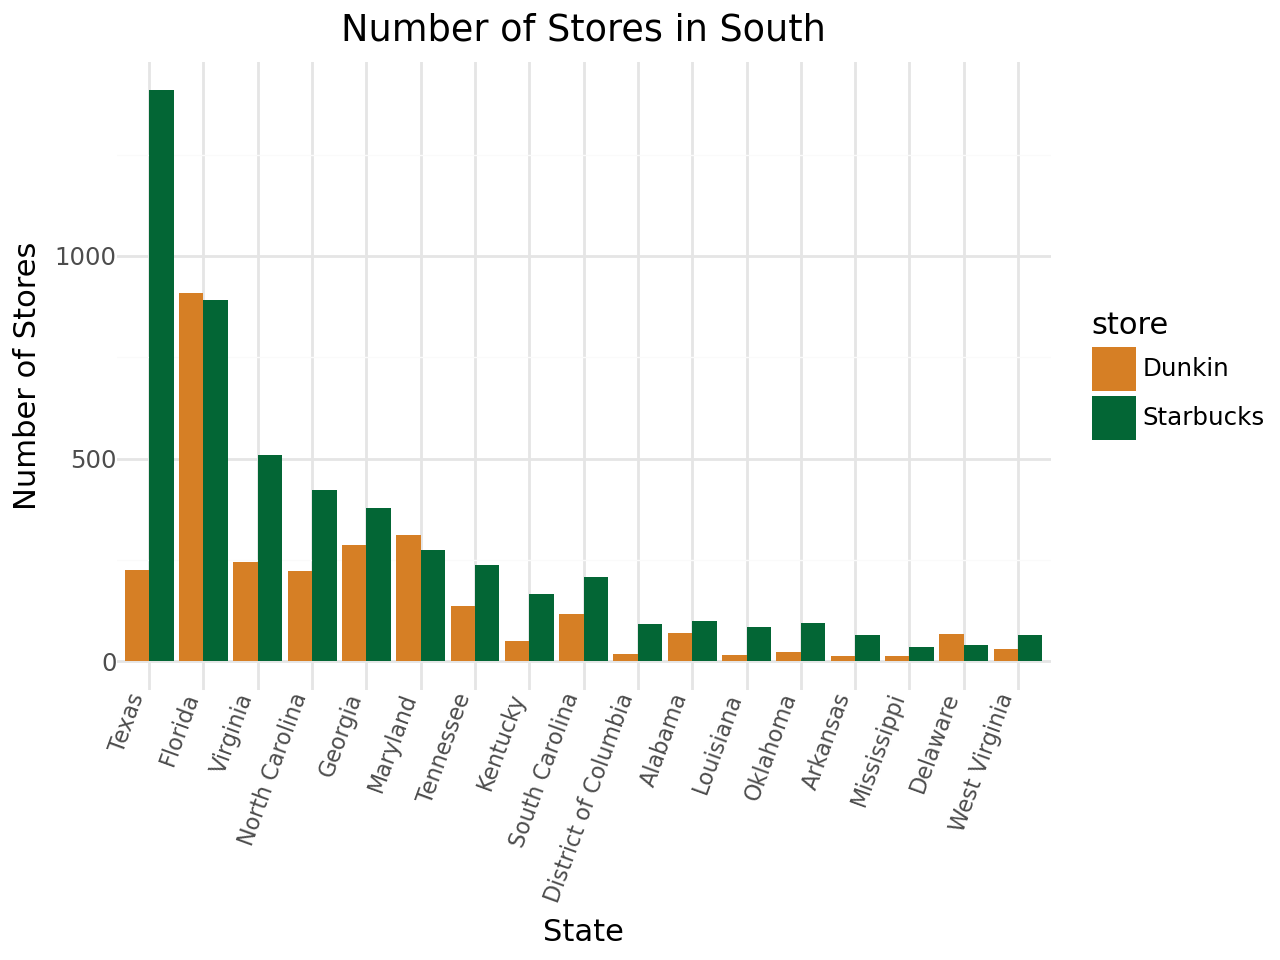

C:\Users\rtnee\AppData\Local\Temp\ipykernel_28708\2098473057.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
c:\Users\rtnee\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 9 rows containing missing values.


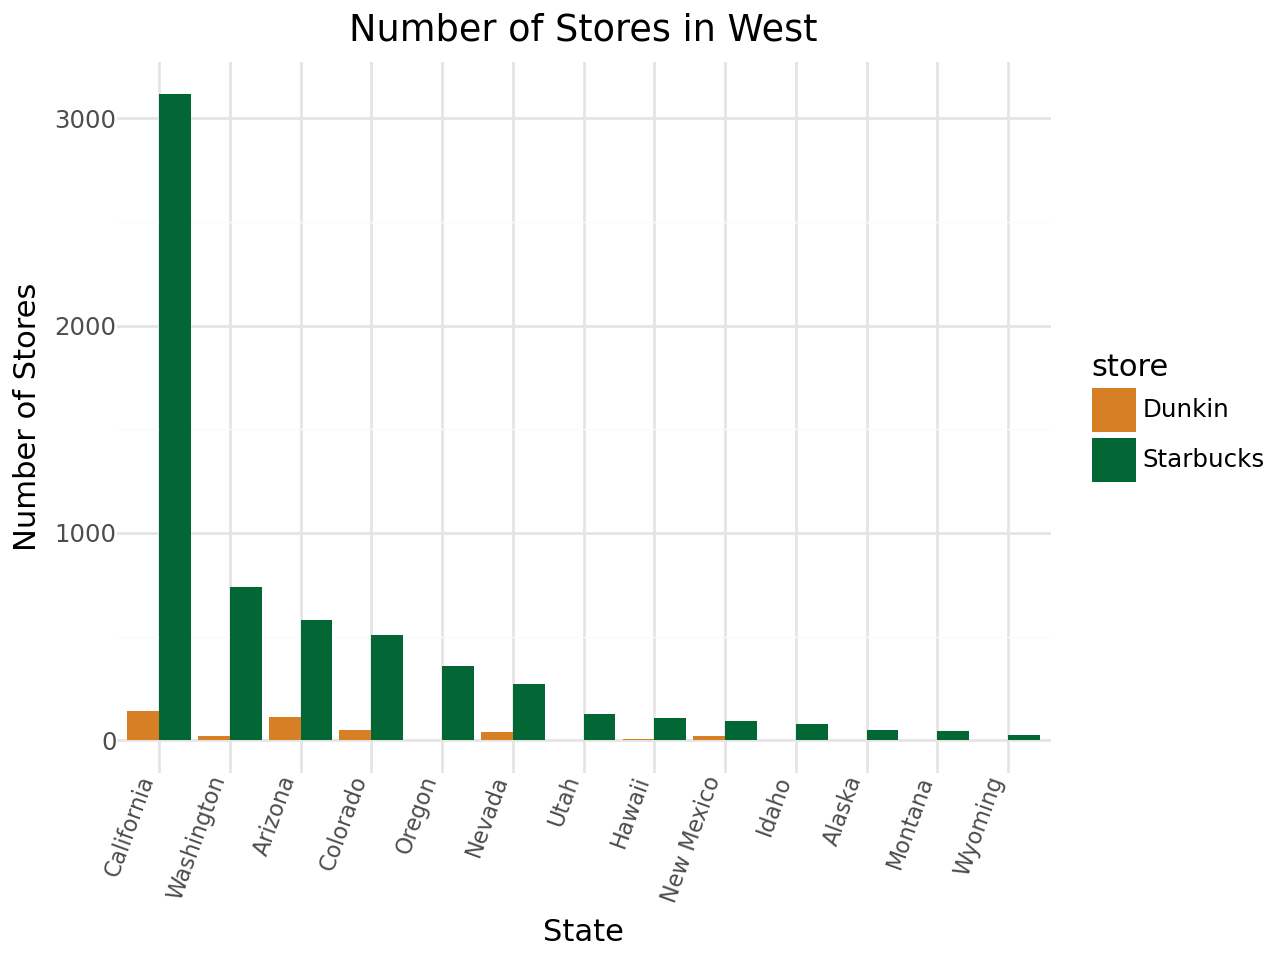

C:\Users\rtnee\AppData\Local\Temp\ipykernel_28708\2098473057.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
c:\Users\rtnee\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 8 rows containing missing values.


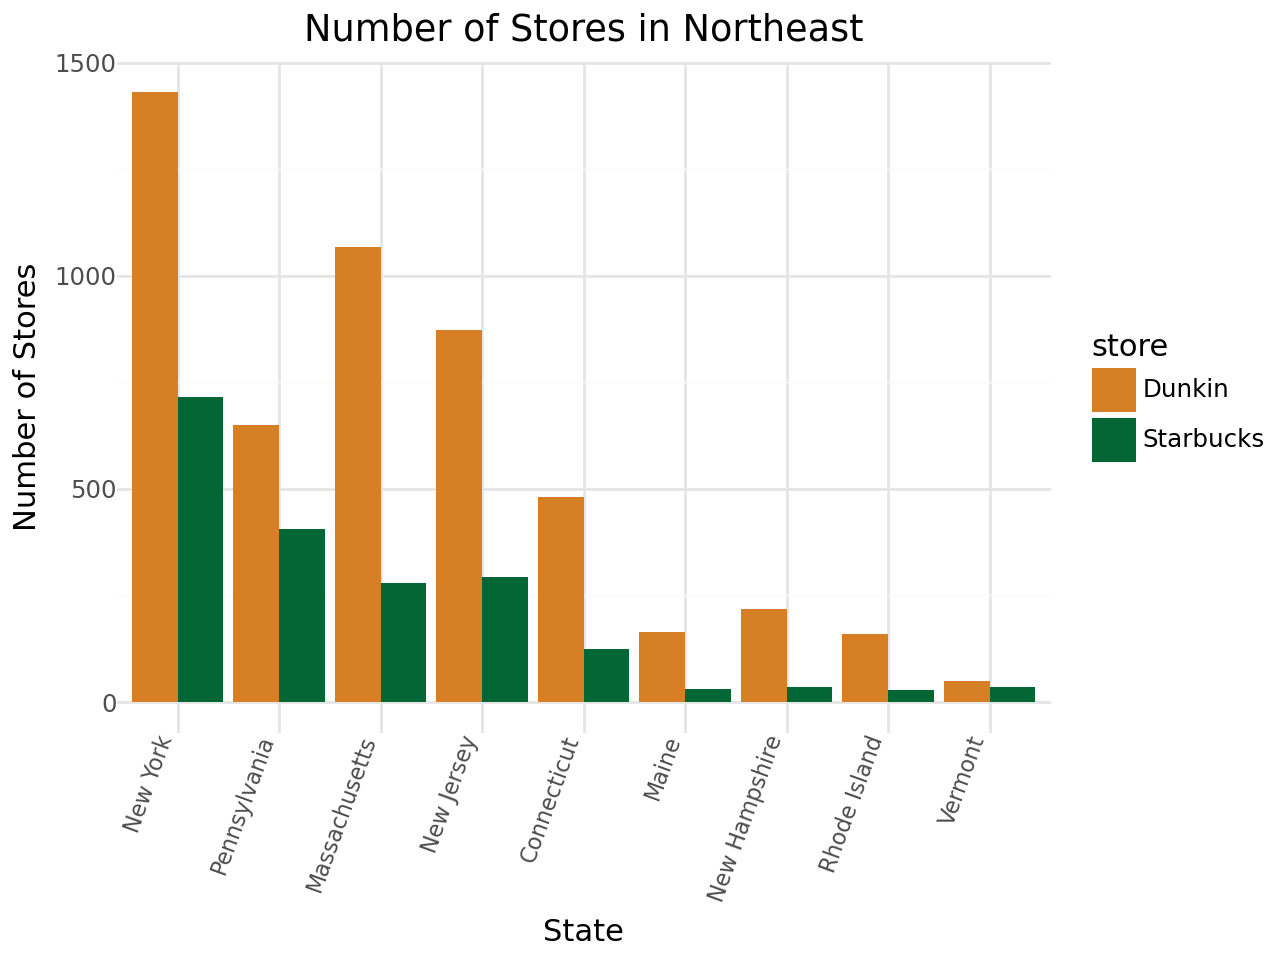

C:\Users\rtnee\AppData\Local\Temp\ipykernel_28708\2098473057.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
c:\Users\rtnee\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_bar : Removed 10 rows containing missing values.


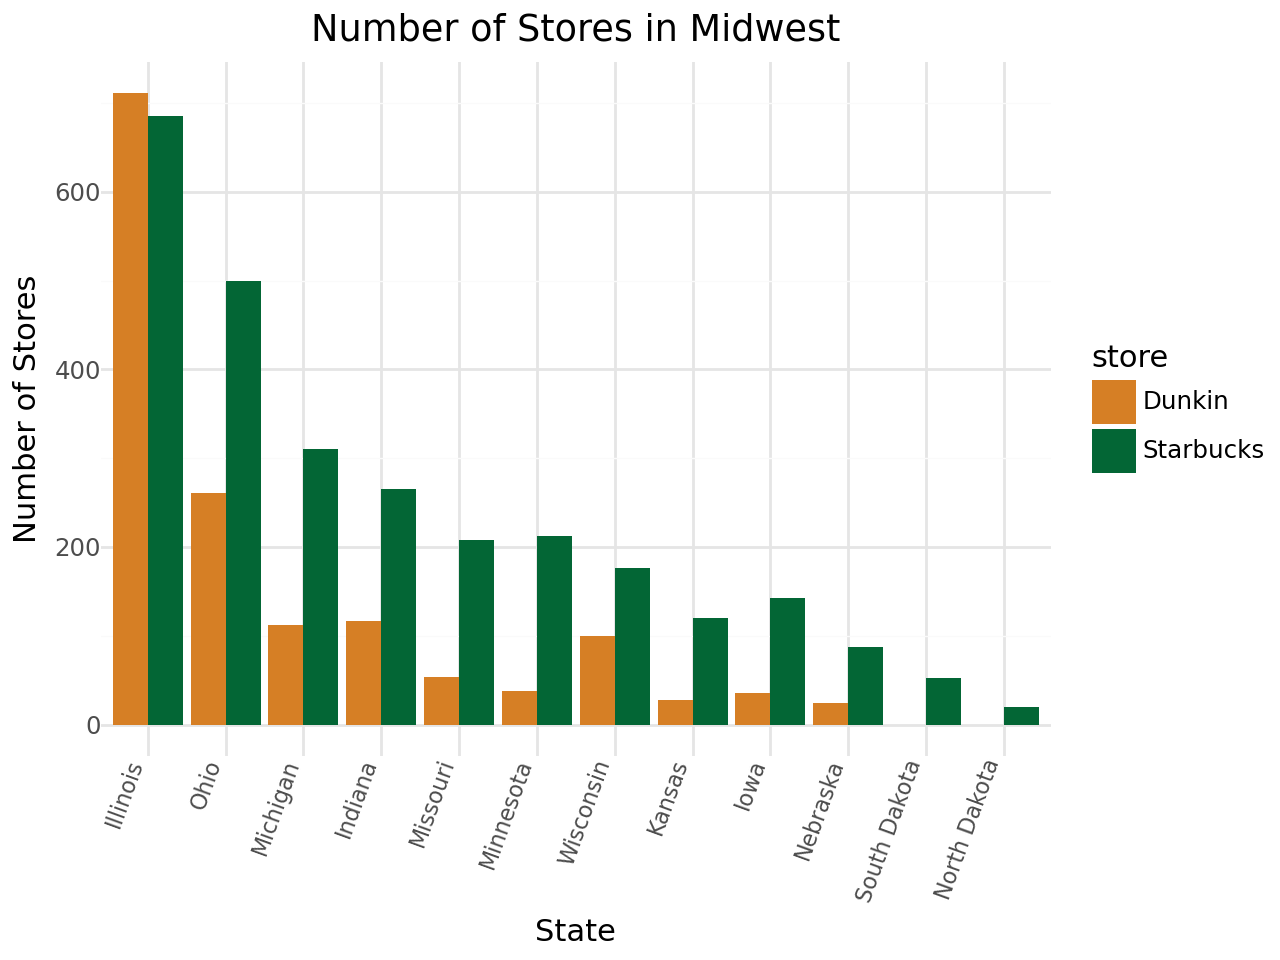

In [39]:

custom_colors = {
    'Starbucks': '#036635',
    'Dunkin': '#D67F25'
}

for region in ['South', 'West', 'Northeast', 'Midwest']:
    region_data = Full_data[(Full_data['Region'] == region) & 
                            (Full_data['State'].isin(Full_data[Full_data['Region'] == region]['State'].unique()))]
    
    plot = (ggplot(region_data, aes(x='State', y='Number of Stores', fill='store')) +
            geom_bar(stat='identity', position='dodge') +
            labs(title=f"Number of Stores in {region}",
                 x="State",
                 y="Number of Stores") +
            scale_fill_manual(values=custom_colors) +
            scale_x_discrete(limits=region_data['State'].unique()) +
            theme_minimal() +
            theme(axis_text_x=element_text(rotation=70, hjust=1, size=8))
    )

    print(plot)

The four plots above go a step further and breaks down the amount of locations in each state. Each one of the graphs is one of the four regions. As it can be seen in the West region visualization, California has the largest value of any state across the four graphs with Starbucks being the dominant chain. In the West region most states don't have any Dunkin locations and the ones that do have mcuh fewer locations than Starbucks. This is different for the Northeast region which has more Dunkin locations for every state with the most popular state being New York. In the Midwest region Dunkin has the highest number of locations in any state in Illinois. However, other than Illinois, Starbucks has more location in every other state in this region. Lastly, in the South region Starbucks dominantes Texas with more than three times the amount of locations to Dunkin, but Dunkin is closer to Starbucks in most of the other states in this region.

Overall, we can see that even though Dunkin has more locations that Starbucks in a few states and regions, Starbucks has many more locations overall. There are no states that have zero Starbucks locations, but there are many states that have no Dunkin locations. Also, even in states where Dunkin has more locations, Starbucks is not behind by a very large margin. All of this information makes sense when keeping in mind the market capitalization of the two companies where Starbucks has a much higher value than Dunkin. Starbucks not only has many more overall locations, but they have a large amount of locations in highly populated areas like California.

c:\Users\rtnee\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 43 rows containing missing values.


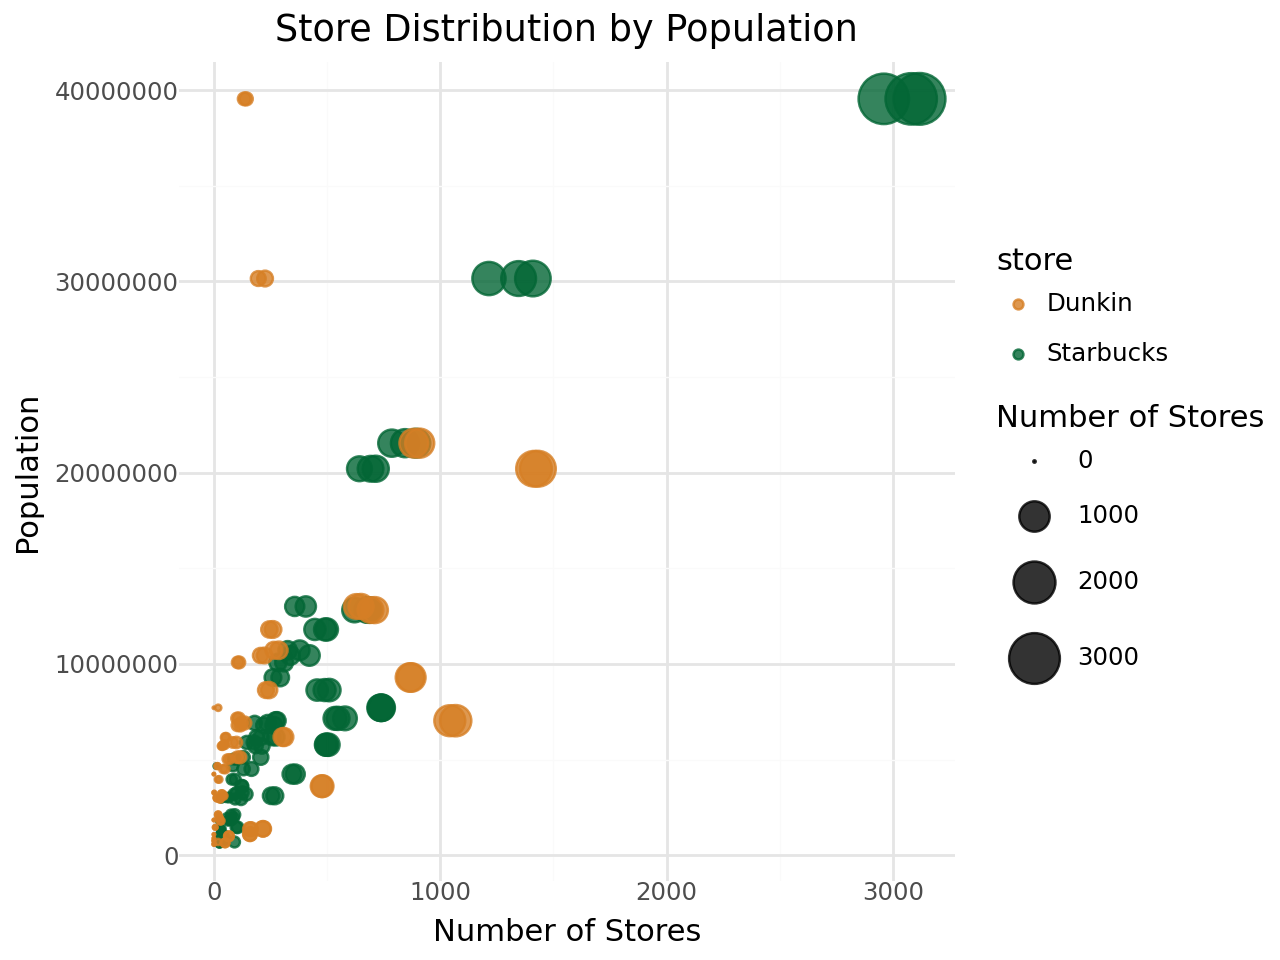

In [40]:
(ggplot(Full_data, aes(x='Number of Stores', y='Population', size='Number of Stores', color='store')) +
    geom_point(alpha=0.8) +
    labs(title='Store Distribution by Population',
         x='Number of Stores',
         y='Population',
         size='Number of Stores') +
    scale_color_manual(values=custom_colors)+
    scale_size_continuous(range=(0, 10))+
    theme_minimal()
)

The visualization above displays a bubble chart that has the number of locations compared to the population with the size of the bubbles being based on the number of locations. As we can see, both chains have relatively low amounts of locations in the less populated states which is why there is a bunching of the data in the bottom left corner. As we look at higher values of the graph we can see points for both Starbucks and Dunkin. However, they major outliers in the plot come from Starbucks which appears to have many stores in some of the highest populated states. At the same time Dunkin has a low number of locations in the highest populated states. This also gives some evidence as to why Starbucks is a higher market cap company since they have many locations in very populated areas, meaning they likely get more business overall.

# Step 7: Automate

In [44]:

def scrape_fun(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', attrs={'class': 'wpr-table'})

    state = []
    store_data = {}

    for row in table.find_all('tr')[1:]:
        cells = row.find_all(['th', 'td'])
        
        state_tag = cells[0].get_text(strip=True)
        state.append(state_tag)

        for i in range(1, len(cells)):
            header = table.find_all('tr')[0].find_all('th')[i].get_text(strip=True)

            if header not in store_data:
                store_data[header] = []

            store_data[header].append(cells[i].get_text(strip=True))

    df = pd.DataFrame(store_data)
    df['State'] = state
    store_name = re.search(r's/([a-z]+)-', url).group(1)
    df['Store'] = store_name.capitalize()

    return df


scrape_fun('https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state')
scrape_fun('https://worldpopulationreview.com/state-rankings/walmart-stores-by-state')


,# of Stores,State,Store
0,517,Texas,Walmart
1,341,Florida,Walmart
2,280,California,Walmart
3,192,North Carolina,Walmart
4,189,Georgia,Walmart
5,161,Illinois,Walmart
6,146,Ohio,Walmart
7,137,Missouri,Walmart
8,137,Tennessee,Walmart
9,134,Pennsylvania,Walmart
